In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\Liver Cirrhosis Stage Dataset\liver_cirrhosis.csv")

In [3]:
df.head()

N_Days Status     Drug    Age Gender Ascites Hepatomegaly Spiders Edema  \
0    2221      C  Placebo  18499      F       N            Y       N     N   
1    1230      C  Placebo  19724      M       Y            N       Y     N   
2    4184      C  Placebo  11839      F       N            N       N     N   
3    2090      D  Placebo  16467      F       N            N       N     N   
4    2105      D  Placebo  21699      F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   
3        0.7        255.0     3.74    23.0    1024.0   77.50           58.0   
4        1.9        486.0     3.54    74.0    1052.0  108.50          109.0   

   Platelets  Prothrombin  Stage  
0      256.0          9.9      1  
1      220.0         10.8      2  
2      225.0         10.0      2  
3      151.0         10.2      2  
4      151.0         11.5      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Gender         25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [6]:
df.describe().T

count          mean          std      min       25%  \
N_Days         25000.0   1887.117040  1091.690918    41.00   1080.00   
Age            25000.0  18495.877080  3737.596616  9598.00  15694.00   
Bilirubin      25000.0      3.402644     4.707491     0.30      0.80   
Cholesterol    25000.0    372.331471   193.668452   120.00    275.00   
Albumin        25000.0      3.486578     0.380488     1.96      3.29   
Copper         25000.0    100.184663    73.184840     4.00     52.00   
Alk_Phos       25000.0   1995.675597  1798.885660   289.00   1032.00   
SGOT           25000.0    123.166345    47.747616    26.35     92.00   
Tryglicerides  25000.0    123.822548    52.786350    33.00     92.00   
Platelets      25000.0    256.007337    98.679006    62.00    189.00   
Prothrombin    25000.0     10.734549     0.904436     9.00     10.00   
Stage          25000.0      2.001160     0.813870     1.00      1.00   

                        50%           75%       max  
N_Days          1680.000000   2576.000000   4795.00  
Age            18499.000000  20955.000000  28650.00  
Bilirubin          1.300000      3.400000     28.00  
Cholesterol      369.510563    369.510563   1775.00  
Albumin            3.510000      3.750000      4.64  
Copper            97.648387    107.000000    588.00  
Alk_Phos        1828.000000   1982.655769  13862.40  
SGOT             122.556346    134.850000    457.25  
Tryglicerides    124.702128    127.000000    598.00  
Platelets        251.000000    311.000000    721.00  
Prothrombin       10.600000     11.100000     18.00  
Stage              2.000000      3.000000      3.00

In [7]:
df["Stage"].value_counts()

Stage
2    8441
3    8294
1    8265
Name: count, dtype: int64

In [12]:
df["Gender"].dtype

dtype('O')

In [13]:
num_cols = [i for i in df.columns if df[i].dtype != "O"]

In [14]:
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

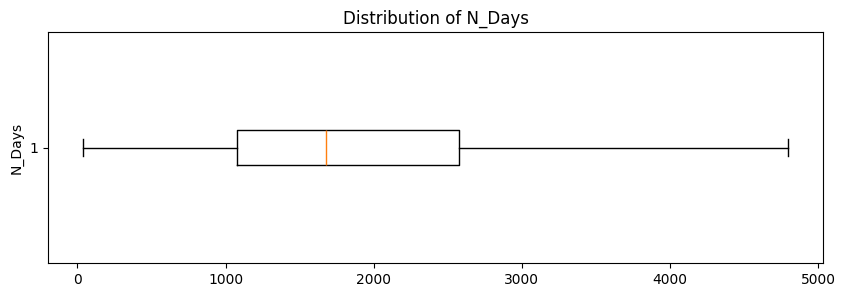

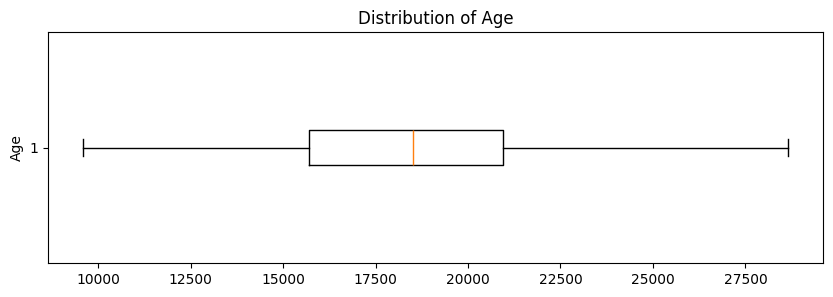

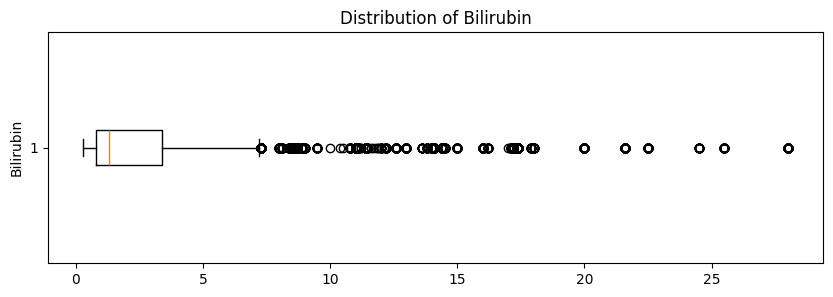

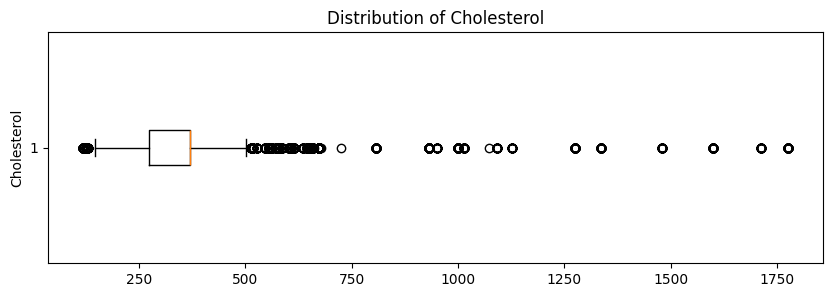

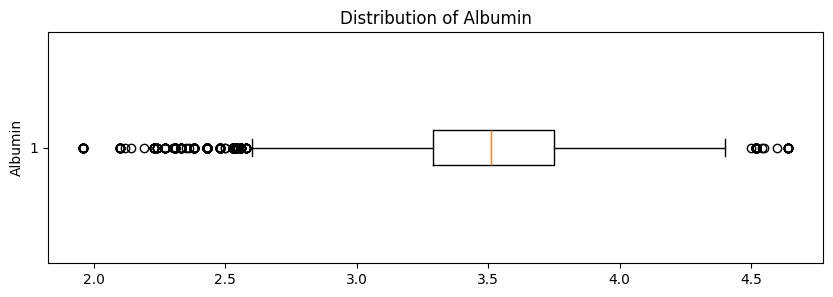

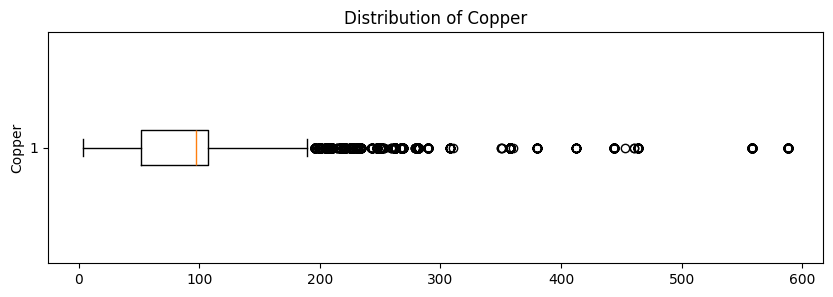

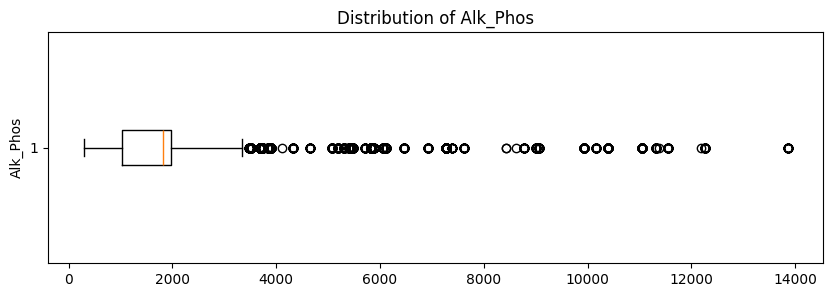

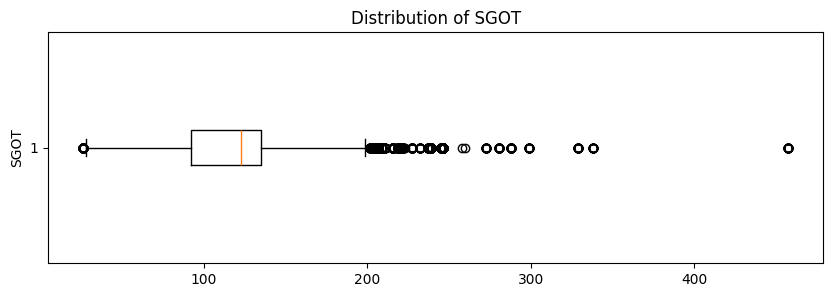

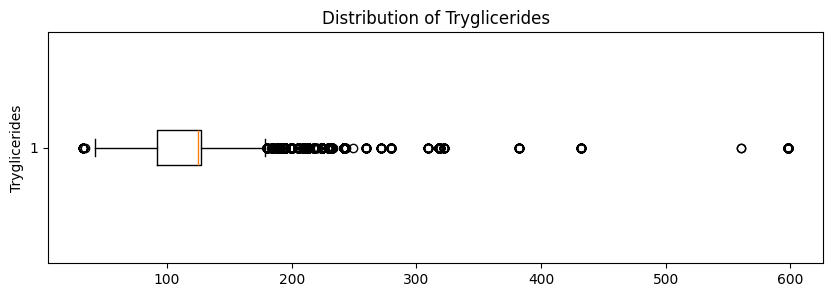

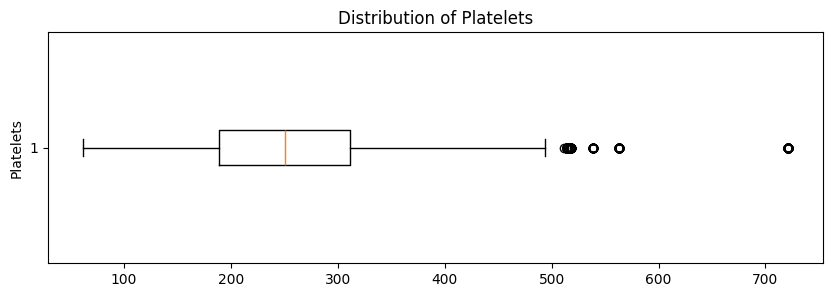

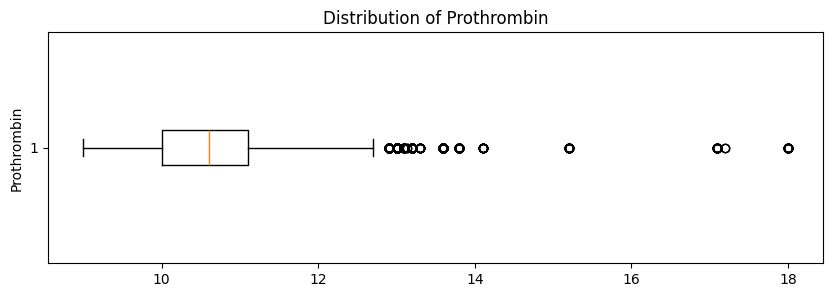

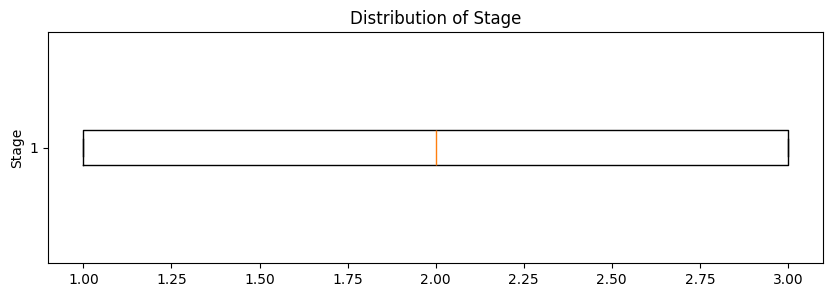

In [18]:
for i in num_cols:
    plt.figure(figsize=(10, 3))
    plt.boxplot(df[i], vert=False)
    plt.ylabel(i)
    plt.title("Distribution of {}".format(i))
    plt.show()

In [20]:
out = ["Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", 
       "Tryglicerides", "Platelets", "Prothrombin"]

In [25]:
a = df["Bilirubin"].quantile(0.9)
a

8.7

In [26]:
df[df["Bilirubin"]<=a]

N_Days Status             Drug    Age Gender Ascites Hepatomegaly  \
0        2221      C          Placebo  18499      F       N            Y   
1        1230      C          Placebo  19724      M       Y            N   
2        4184      C          Placebo  11839      F       N            N   
3        2090      D          Placebo  16467      F       N            N   
4        2105      D          Placebo  21699      F       N            Y   
...       ...    ...              ...    ...    ...     ...          ...   
24995    3584      D  D-penicillamine  23612      F       N            N   
24996    3584      D  D-penicillamine  23612      F       N            N   
24997     971      D  D-penicillamine  16736      F       N            Y   
24998    3707      C  D-penicillamine  16990      F       N            Y   
24999    3707      C  D-penicillamine  16990      F       N            Y   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           N     N        0.5   149.000000     4.04   227.0     598.0   
1           Y     N        0.5   219.000000     3.93    22.0     663.0   
2           N     N        0.5   320.000000     3.54    51.0    1243.0   
3           N     N        0.7   255.000000     3.74    23.0    1024.0   
4           N     N        1.9   486.000000     3.54    74.0    1052.0   
...       ...   ...        ...          ...      ...     ...       ...   
24995       N     N        0.8   231.000000     3.87   173.0    9009.8   
24996       N     N        0.8   231.000000     3.87   173.0    9009.8   
24997       Y     Y        5.1   369.510563     3.23    18.0     790.0   
24998       N     N        0.8   315.000000     4.24    13.0    1637.0   
24999       N     N        0.8   315.000000     4.24    13.0    1637.0   

         SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0       52.70      57.000000      256.0          9.9      1  
1       45.00      75.000000      220.0         10.8      2  
2      122.45      80.000000      225.0         10.0      2  
3       77.50      58.000000      151.0         10.2      2  
4      108.50     109.000000      151.0         11.5      1  
...       ...            ...        ...          ...    ...  
24995  127.71      96.000000      295.0         11.0      2  
24996  127.71      96.000000      295.0         11.0      2  
24997  179.80     124.702128      104.0         13.0      3  
24998  170.50      70.000000      426.0         10.9      2  
24999  170.50      70.000000      426.0         10.9      2  

[22573 rows x 19 columns]

In [27]:
df.groupby("Stage")["Bilirubin"].mean()

Stage
1    2.473793
2    3.315283
3    4.417157
Name: Bilirubin, dtype: float64

In [29]:
df["Cholesterol"].quantile(0.95)

646.0

In [30]:
df[df["Cholesterol"]<=df["Cholesterol"].quantile(0.95)]

N_Days Status             Drug    Age Gender Ascites Hepatomegaly  \
0        2221      C          Placebo  18499      F       N            Y   
1        1230      C          Placebo  19724      M       Y            N   
2        4184      C          Placebo  11839      F       N            N   
3        2090      D          Placebo  16467      F       N            N   
4        2105      D          Placebo  21699      F       N            Y   
...       ...    ...              ...    ...    ...     ...          ...   
24995    3584      D  D-penicillamine  23612      F       N            N   
24996    3584      D  D-penicillamine  23612      F       N            N   
24997     971      D  D-penicillamine  16736      F       N            Y   
24998    3707      C  D-penicillamine  16990      F       N            Y   
24999    3707      C  D-penicillamine  16990      F       N            Y   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           N     N        0.5   149.000000     4.04   227.0     598.0   
1           Y     N        0.5   219.000000     3.93    22.0     663.0   
2           N     N        0.5   320.000000     3.54    51.0    1243.0   
3           N     N        0.7   255.000000     3.74    23.0    1024.0   
4           N     N        1.9   486.000000     3.54    74.0    1052.0   
...       ...   ...        ...          ...      ...     ...       ...   
24995       N     N        0.8   231.000000     3.87   173.0    9009.8   
24996       N     N        0.8   231.000000     3.87   173.0    9009.8   
24997       Y     Y        5.1   369.510563     3.23    18.0     790.0   
24998       N     N        0.8   315.000000     4.24    13.0    1637.0   
24999       N     N        0.8   315.000000     4.24    13.0    1637.0   

         SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0       52.70      57.000000      256.0          9.9      1  
1       45.00      75.000000      220.0         10.8      2  
2      122.45      80.000000      225.0         10.0      2  
3       77.50      58.000000      151.0         10.2      2  
4      108.50     109.000000      151.0         11.5      1  
...       ...            ...        ...          ...    ...  
24995  127.71      96.000000      295.0         11.0      2  
24996  127.71      96.000000      295.0         11.0      2  
24997  179.80     124.702128      104.0         13.0      3  
24998  170.50      70.000000      426.0         10.9      2  
24999  170.50      70.000000      426.0         10.9      2  

[23764 rows x 19 columns]

In [31]:
df.groupby("Stage")["Cholesterol"].mean()

Stage
1    350.900239
2    402.436138
3    363.049538
Name: Cholesterol, dtype: float64

In [32]:
df[df["Cholesterol"]<=df["Cholesterol"].quantile(0.95)].groupby("Stage")["Cholesterol"].mean()

Stage
1    336.930134
2    340.781872
3    333.460472
Name: Cholesterol, dtype: float64

In [33]:
df["Cholesterol"].describe()

count    25000.000000
mean       372.331471
std        193.668452
min        120.000000
25%        275.000000
50%        369.510563
75%        369.510563
max       1775.000000
Name: Cholesterol, dtype: float64

In [53]:
ind = df[df["Cholesterol"]>646].index

In [67]:
df["Cholesterol"] = list(map(lambda x: 372 if x > 646 else x, df["Cholesterol"]))

In [68]:
df["Cholesterol"].describe()

count    25000.000000
mean       338.757591
std         83.916718
min        120.000000
25%        275.000000
50%        369.510563
75%        369.510563
max        646.000000
Name: Cholesterol, dtype: float64

<Axes: >

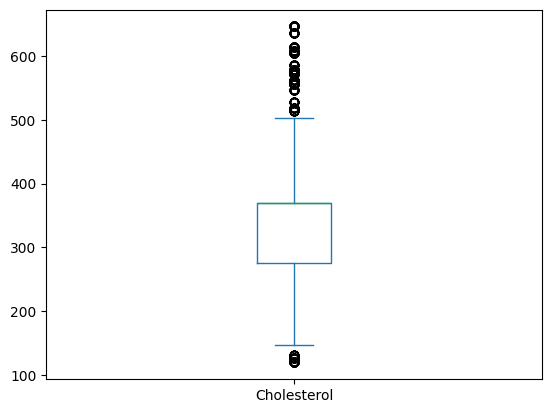

In [69]:
df["Cholesterol"].plot.box()

<Axes: >

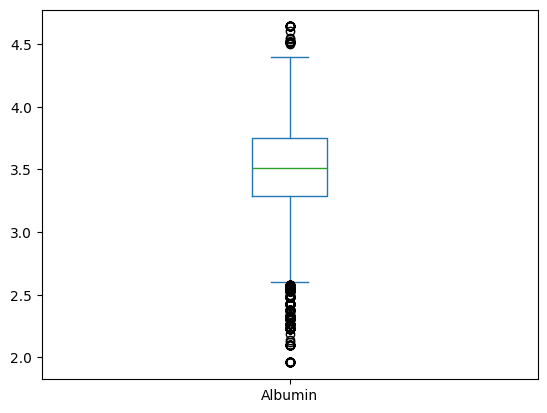

In [71]:
df["Albumin"].plot.box()

In [75]:
df["Albumin"].quantile(0.01)

2.43

In [77]:
df = df[df["Albumin"]>=2.43]

<Axes: >

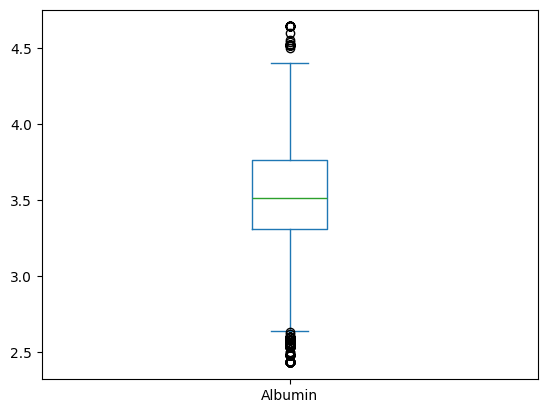

In [78]:
df["Albumin"].plot.box()

In [79]:
out

['Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

<Axes: >

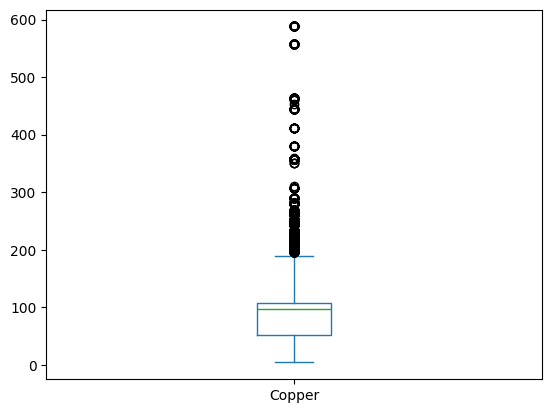

In [80]:
df["Copper"].plot.box()

In [83]:
df["Copper"].quantile(0.95)

231.0

In [84]:
df[df["Copper"]<=231]

N_Days Status             Drug    Age Gender Ascites Hepatomegaly  \
0        2221      C          Placebo  18499      F       N            Y   
1        1230      C          Placebo  19724      M       Y            N   
2        4184      C          Placebo  11839      F       N            N   
3        2090      D          Placebo  16467      F       N            N   
4        2105      D          Placebo  21699      F       N            Y   
...       ...    ...              ...    ...    ...     ...          ...   
24995    3584      D  D-penicillamine  23612      F       N            N   
24996    3584      D  D-penicillamine  23612      F       N            N   
24997     971      D  D-penicillamine  16736      F       N            Y   
24998    3707      C  D-penicillamine  16990      F       N            Y   
24999    3707      C  D-penicillamine  16990      F       N            Y   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           N     N        0.5   149.000000     4.04   227.0     598.0   
1           Y     N        0.5   219.000000     3.93    22.0     663.0   
2           N     N        0.5   320.000000     3.54    51.0    1243.0   
3           N     N        0.7   255.000000     3.74    23.0    1024.0   
4           N     N        1.9   486.000000     3.54    74.0    1052.0   
...       ...   ...        ...          ...      ...     ...       ...   
24995       N     N        0.8   231.000000     3.87   173.0    9009.8   
24996       N     N        0.8   231.000000     3.87   173.0    9009.8   
24997       Y     Y        5.1   369.510563     3.23    18.0     790.0   
24998       N     N        0.8   315.000000     4.24    13.0    1637.0   
24999       N     N        0.8   315.000000     4.24    13.0    1637.0   

         SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0       52.70      57.000000      256.0          9.9      1  
1       45.00      75.000000      220.0         10.8      2  
2      122.45      80.000000      225.0         10.0      2  
3       77.50      58.000000      151.0         10.2      2  
4      108.50     109.000000      151.0         11.5      1  
...       ...            ...        ...          ...    ...  
24995  127.71      96.000000      295.0         11.0      2  
24996  127.71      96.000000      295.0         11.0      2  
24997  179.80     124.702128      104.0         13.0      3  
24998  170.50      70.000000      426.0         10.9      2  
24999  170.50      70.000000      426.0         10.9      2  

[23663 rows x 19 columns]

In [85]:
df["Copper"].describe()

count    24781.000000
mean        99.955857
std         73.226007
min          4.000000
25%         52.000000
50%         97.648387
75%        107.000000
max        588.000000
Name: Copper, dtype: float64

In [86]:
df["Copper"] = list(map(lambda x: 99 if x > 231 else x, df["Copper"]))

In [87]:
df["Copper"].describe()

count    24781.000000
mean        89.366414
std         47.965574
min          4.000000
25%         52.000000
50%         97.648387
75%         99.000000
max        231.000000
Name: Copper, dtype: float64

<Axes: >

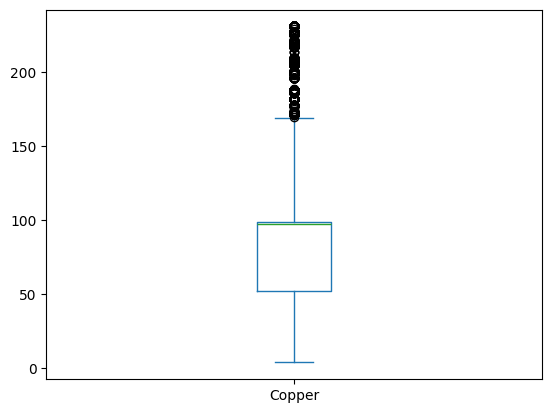

In [88]:
df["Copper"].plot.box()

<Axes: >

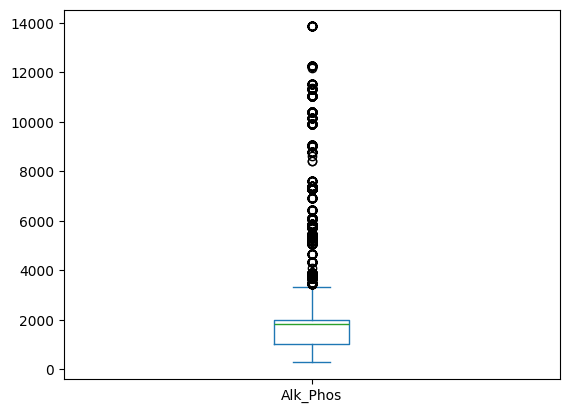

In [89]:
df["Alk_Phos"].plot.box()

In [91]:
df["Alk_Phos"].quantile(0.95)

5487.2

In [92]:
df[df["Alk_Phos"]<=5487.2]

N_Days Status             Drug    Age Gender Ascites Hepatomegaly  \
0        2221      C          Placebo  18499      F       N            Y   
1        1230      C          Placebo  19724      M       Y            N   
2        4184      C          Placebo  11839      F       N            N   
3        2090      D          Placebo  16467      F       N            N   
4        2105      D          Placebo  21699      F       N            Y   
...       ...    ...              ...    ...    ...     ...          ...   
24992     694      D  D-penicillamine  28650      M       Y            Y   
24993    2475     CL  D-penicillamine  13329      F       N            N   
24997     971      D  D-penicillamine  16736      F       N            Y   
24998    3707      C  D-penicillamine  16990      F       N            Y   
24999    3707      C  D-penicillamine  16990      F       N            Y   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           N     N        0.5   149.000000     4.04   227.0     598.0   
1           Y     N        0.5   219.000000     3.93    22.0     663.0   
2           N     N        0.5   320.000000     3.54    51.0    1243.0   
3           N     N        0.7   255.000000     3.74    23.0    1024.0   
4           N     N        1.9   486.000000     3.54    74.0    1052.0   
...       ...   ...        ...          ...      ...     ...       ...   
24992       Y     N        0.8   300.000000     2.94   231.0    1794.0   
24993       N     N        3.4   450.000000     3.37    32.0    1408.0   
24997       Y     Y        5.1   369.510563     3.23    18.0     790.0   
24998       N     N        0.8   315.000000     4.24    13.0    1637.0   
24999       N     N        0.8   315.000000     4.24    13.0    1637.0   

         SGOT  Tryglicerides  Platelets  Prothrombin  Stage  
0       52.70      57.000000      256.0          9.9      1  
1       45.00      75.000000      220.0         10.8      2  
2      122.45      80.000000      225.0         10.0      2  
3       77.50      58.000000      151.0         10.2      2  
4      108.50     109.000000      151.0         11.5      1  
...       ...            ...        ...          ...    ...  
24992  130.20      99.000000       97.0         11.2      3  
24993  116.25     118.000000      313.0         11.2      1  
24997  179.80     124.702128      104.0         13.0      3  
24998  170.50      70.000000      426.0         10.9      2  
24999  170.50      70.000000      426.0         10.9      2  

[23547 rows x 19 columns]

In [93]:
df["Alk_Phos"].describe()

count    24781.000000
mean      1998.205544
std       1800.847917
min        289.000000
25%       1040.000000
50%       1828.000000
75%       1982.655769
max      13862.400000
Name: Alk_Phos, dtype: float64

In [94]:
df["Alk_Phos"] = list(map(lambda x: 1828 if x > 5487.2 else x, df["Alk_Phos"]))

In [95]:
df["Alk_Phos"].describe()

count    24781.000000
mean      1660.727024
std        839.044276
min        289.000000
25%       1040.000000
50%       1828.000000
75%       1982.655769
max       5487.200000
Name: Alk_Phos, dtype: float64

<Axes: >

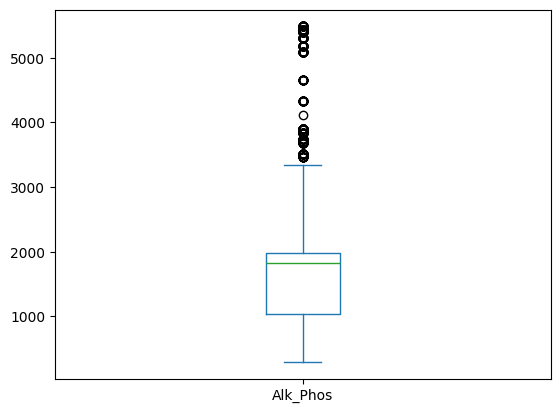

In [96]:
df["Alk_Phos"].plot.box()

<Axes: >

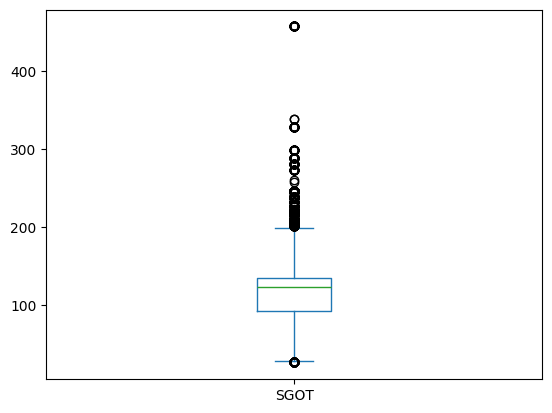

In [97]:
df["SGOT"].plot.box()

In [103]:
df["SGOT"].quantile(0.97)

227.04

In [105]:
df = df[df["SGOT"]<=227]

In [106]:
out

['Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

<Axes: >

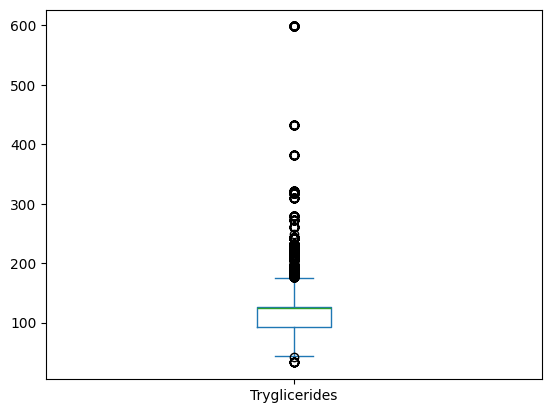

In [107]:
df["Tryglicerides"].plot.box()

In [110]:
df["Tryglicerides"].quantile(0.97)

242.0

In [112]:
df = df[df["Tryglicerides"]<=242]

<Axes: >

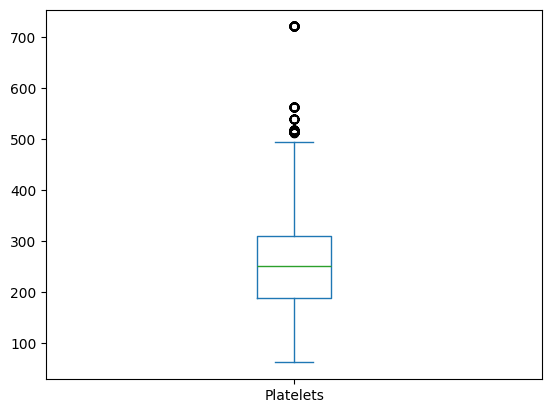

In [113]:
df["Platelets"].plot.box()

In [114]:
df["Platelets"].quantile(0.99)

514.0

In [116]:
df = df[df["Platelets"]<=514]

In [117]:
out

['Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

<Axes: >

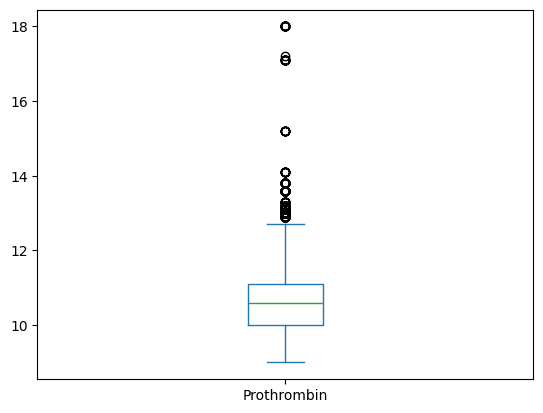

In [118]:
df["Prothrombin"].plot.box()

In [122]:
df["Prothrombin"].quantile(0.98)

13.0

In [124]:
df = df[df["Prothrombin"]<=13]

In [126]:
df.reset_index(inplace=True, drop=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22918 entries, 0 to 22917
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         22918 non-null  int64  
 1   Status         22918 non-null  object 
 2   Drug           22918 non-null  object 
 3   Age            22918 non-null  int64  
 4   Gender         22918 non-null  object 
 5   Ascites        22918 non-null  object 
 6   Hepatomegaly   22918 non-null  object 
 7   Spiders        22918 non-null  object 
 8   Edema          22918 non-null  object 
 9   Bilirubin      22918 non-null  float64
 10  Cholesterol    22918 non-null  float64
 11  Albumin        22918 non-null  float64
 12  Copper         22918 non-null  float64
 13  Alk_Phos       22918 non-null  float64
 14  SGOT           22918 non-null  float64
 15  Tryglicerides  22918 non-null  float64
 16  Platelets      22918 non-null  float64
 17  Prothrombin    22918 non-null  float64
 18  Stage 

In [128]:
df.describe().T

count          mean          std      min       25%  \
N_Days         22918.0   1921.539707  1083.828138    41.00   1119.00   
Age            22918.0  18459.158129  3767.640250  9598.00  15601.00   
Bilirubin      22918.0      3.107282     4.408391     0.30      0.80   
Cholesterol    22918.0    336.483253    83.705984   120.00    274.00   
Albumin        22918.0      3.505360     0.360486     2.43      3.34   
Copper         22918.0     89.100113    48.308141     4.00     52.00   
Alk_Phos       22918.0   1635.898813   805.087051   289.00   1031.00   
SGOT           22918.0    118.477751    38.921820    26.35     91.00   
Tryglicerides  22918.0    118.953051    38.042421    33.00     91.00   
Platelets      22918.0    253.197533    91.119876    62.00    190.00   
Prothrombin    22918.0     10.651889     0.746701     9.00     10.00   
Stage          22918.0      1.970722     0.810148     1.00      1.00   

                        50%           75%       max  
N_Days          1702.000000   2598.000000   4795.00  
Age            18460.000000  20955.000000  28650.00  
Bilirubin          1.300000      3.300000     28.00  
Cholesterol      369.510563    369.510563    646.00  
Albumin            3.520000      3.760000      4.64  
Copper            97.648387     99.000000    231.00  
Alk_Phos        1828.000000   1982.655769   5487.20  
SGOT             122.556346    130.000000    223.00  
Tryglicerides    124.702128    124.702128    242.00  
Platelets        251.000000    309.000000    514.00  
Prothrombin       10.600000     11.100000     13.00  
Stage              2.000000      3.000000      3.00

In [130]:
cat_col = [i for i in df.columns if df[i].dtype == "O"]

In [131]:
cat_col

['Status', 'Drug', 'Gender', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [132]:
pd.crosstab(df["Stage"], df["Status"])

Status     C   CL     D
Stage                  
1       5420  714  1732
2       4581  611  2665
3       2983  624  3588

In [134]:
[pd.crosstab(df["Stage"], df[i]) for i in cat_col]

[Status     C   CL     D
 Stage                  
 1       5420  714  1732
 2       4581  611  2665
 3       2983  624  3588,
 Drug   D-penicillamine  Placebo
 Stage                          
 1                 3256     4610
 2                 2559     5298
 3                 2676     4519,
 Gender     F    M
 Stage            
 1       7167  699
 2       6890  967
 3       6221  974,
 Ascites     N     Y
 Stage              
 1        5699  2167
 2        5675  2182
 3        4203  2992,
 Hepatomegaly     N     Y
 Stage                   
 1             6490  1376
 2             4812  3045
 3             2896  4299,
 Spiders     N     Y
 Stage              
 1        5058  2808
 2        4568  3289
 3        3176  4019,
 Edema     N     S    Y
 Stage                 
 1      6984   726  156
 2      6976   826   55
 3      4842  1775  578]

In [139]:
dummies = pd.get_dummies(df["Status"], drop_first=True, dtype=int)

In [144]:
df = pd.concat([df.drop(columns="Status"), dummies], axis=1)

In [145]:
df.head(3)

N_Days     Drug    Age Gender Ascites Hepatomegaly Spiders Edema  \
0    2221  Placebo  18499      F       N            Y       N     N   
1    1230  Placebo  19724      M       Y            N       Y     N   
2    4184  Placebo  11839      F       N            N       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        0.5        149.0     4.04   227.0     598.0   52.70           57.0   
1        0.5        219.0     3.93    22.0     663.0   45.00           75.0   
2        0.5        320.0     3.54    51.0    1243.0  122.45           80.0   

   Platelets  Prothrombin  Stage  CL  D  
0      256.0          9.9      1   0  0  
1      220.0         10.8      2   0  0  
2      225.0         10.0      2   0  0

In [147]:
df["Gender"] = df["Gender"].map({"F":0, "M":1})

In [148]:
df["Ascites"] = df["Ascites"].map({"Y":1, "N":0})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"Y":1, "N":0})
df["Spiders"] = df["Spiders"].map({"Y":1, "N":0})

In [149]:
ohe = OneHotEncoder()

In [152]:
edema = ohe.fit_transform(df[["Edema"]]).toarray()
edema

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [158]:
ohe.categories_

[array(['N', 'S', 'Y'], dtype=object)]

In [160]:
df[["N", "S", "Y"]] = edema

In [161]:
df.head()

N_Days     Drug    Age  Gender  Ascites  Hepatomegaly  Spiders Edema  \
0    2221  Placebo  18499       0        0             1        0     N   
1    1230  Placebo  19724       1        1             0        1     N   
2    4184  Placebo  11839       0        0             0        0     N   
3    2090  Placebo  16467       0        0             0        0     N   
4    2105  Placebo  21699       0        0             1        0     N   

   Bilirubin  Cholesterol  ...    SGOT  Tryglicerides  Platelets  Prothrombin  \
0        0.5        149.0  ...   52.70           57.0      256.0          9.9   
1        0.5        219.0  ...   45.00           75.0      220.0         10.8   
2        0.5        320.0  ...  122.45           80.0      225.0         10.0   
3        0.7        255.0  ...   77.50           58.0      151.0         10.2   
4        1.9        486.0  ...  108.50          109.0      151.0         11.5   

   Stage  CL  D    N    S    Y  
0      1   0  0  1.0  0.0  0.0  
1      2   0  0  1.0  0.0  0.0  
2      2   0  0  1.0  0.0  0.0  
3      2   0  1  1.0  0.0  0.0  
4      1   0  1  1.0  0.0  0.0  

[5 rows x 23 columns]

In [162]:
df.drop(columns="Edema", inplace=True)

In [163]:
df.head()

N_Days     Drug    Age  Gender  Ascites  Hepatomegaly  Spiders  Bilirubin  \
0    2221  Placebo  18499       0        0             1        0        0.5   
1    1230  Placebo  19724       1        1             0        1        0.5   
2    4184  Placebo  11839       0        0             0        0        0.5   
3    2090  Placebo  16467       0        0             0        0        0.7   
4    2105  Placebo  21699       0        0             1        0        1.9   

   Cholesterol  Albumin  ...    SGOT  Tryglicerides  Platelets  Prothrombin  \
0        149.0     4.04  ...   52.70           57.0      256.0          9.9   
1        219.0     3.93  ...   45.00           75.0      220.0         10.8   
2        320.0     3.54  ...  122.45           80.0      225.0         10.0   
3        255.0     3.74  ...   77.50           58.0      151.0         10.2   
4        486.0     3.54  ...  108.50          109.0      151.0         11.5   

   Stage  CL  D    N    S    Y  
0      1   0  0  1.0  0.0  0.0  
1      2   0  0  1.0  0.0  0.0  
2      2   0  0  1.0  0.0  0.0  
3      2   0  1  1.0  0.0  0.0  
4      1   0  1  1.0  0.0  0.0  

[5 rows x 22 columns]

In [164]:
df["Drug"] = df["Drug"].map({"D-penicillamine":0,  "Placebo":1})

In [165]:
df.head()

N_Days  Drug    Age  Gender  Ascites  Hepatomegaly  Spiders  Bilirubin  \
0    2221     1  18499       0        0             1        0        0.5   
1    1230     1  19724       1        1             0        1        0.5   
2    4184     1  11839       0        0             0        0        0.5   
3    2090     1  16467       0        0             0        0        0.7   
4    2105     1  21699       0        0             1        0        1.9   

   Cholesterol  Albumin  ...    SGOT  Tryglicerides  Platelets  Prothrombin  \
0        149.0     4.04  ...   52.70           57.0      256.0          9.9   
1        219.0     3.93  ...   45.00           75.0      220.0         10.8   
2        320.0     3.54  ...  122.45           80.0      225.0         10.0   
3        255.0     3.74  ...   77.50           58.0      151.0         10.2   
4        486.0     3.54  ...  108.50          109.0      151.0         11.5   

   Stage  CL  D    N    S    Y  
0      1   0  0  1.0  0.0  0.0  
1      2   0  0  1.0  0.0  0.0  
2      2   0  0  1.0  0.0  0.0  
3      2   0  1  1.0  0.0  0.0  
4      1   0  1  1.0  0.0  0.0  

[5 rows x 22 columns]

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22918 entries, 0 to 22917
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         22918 non-null  int64  
 1   Drug           22918 non-null  int64  
 2   Age            22918 non-null  int64  
 3   Gender         22918 non-null  int64  
 4   Ascites        22918 non-null  int64  
 5   Hepatomegaly   22918 non-null  int64  
 6   Spiders        22918 non-null  int64  
 7   Bilirubin      22918 non-null  float64
 8   Cholesterol    22918 non-null  float64
 9   Albumin        22918 non-null  float64
 10  Copper         22918 non-null  float64
 11  Alk_Phos       22918 non-null  float64
 12  SGOT           22918 non-null  float64
 13  Tryglicerides  22918 non-null  float64
 14  Platelets      22918 non-null  float64
 15  Prothrombin    22918 non-null  float64
 16  Stage          22918 non-null  int64  
 17  CL             22918 non-null  int32  
 18  D     

In [167]:
df.duplicated().sum()

14157

In [171]:
df.drop_duplicates(inplace=True)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 0 to 22911
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8761 non-null   int64  
 1   Drug           8761 non-null   int64  
 2   Age            8761 non-null   int64  
 3   Gender         8761 non-null   int64  
 4   Ascites        8761 non-null   int64  
 5   Hepatomegaly   8761 non-null   int64  
 6   Spiders        8761 non-null   int64  
 7   Bilirubin      8761 non-null   float64
 8   Cholesterol    8761 non-null   float64
 9   Albumin        8761 non-null   float64
 10  Copper         8761 non-null   float64
 11  Alk_Phos       8761 non-null   float64
 12  SGOT           8761 non-null   float64
 13  Tryglicerides  8761 non-null   float64
 14  Platelets      8761 non-null   float64
 15  Prothrombin    8761 non-null   float64
 16  Stage          8761 non-null   int64  
 17  CL             8761 non-null   int32  
 18  D           

In [174]:
num_cols = num_cols[:-1]

In [175]:
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

<Axes: >

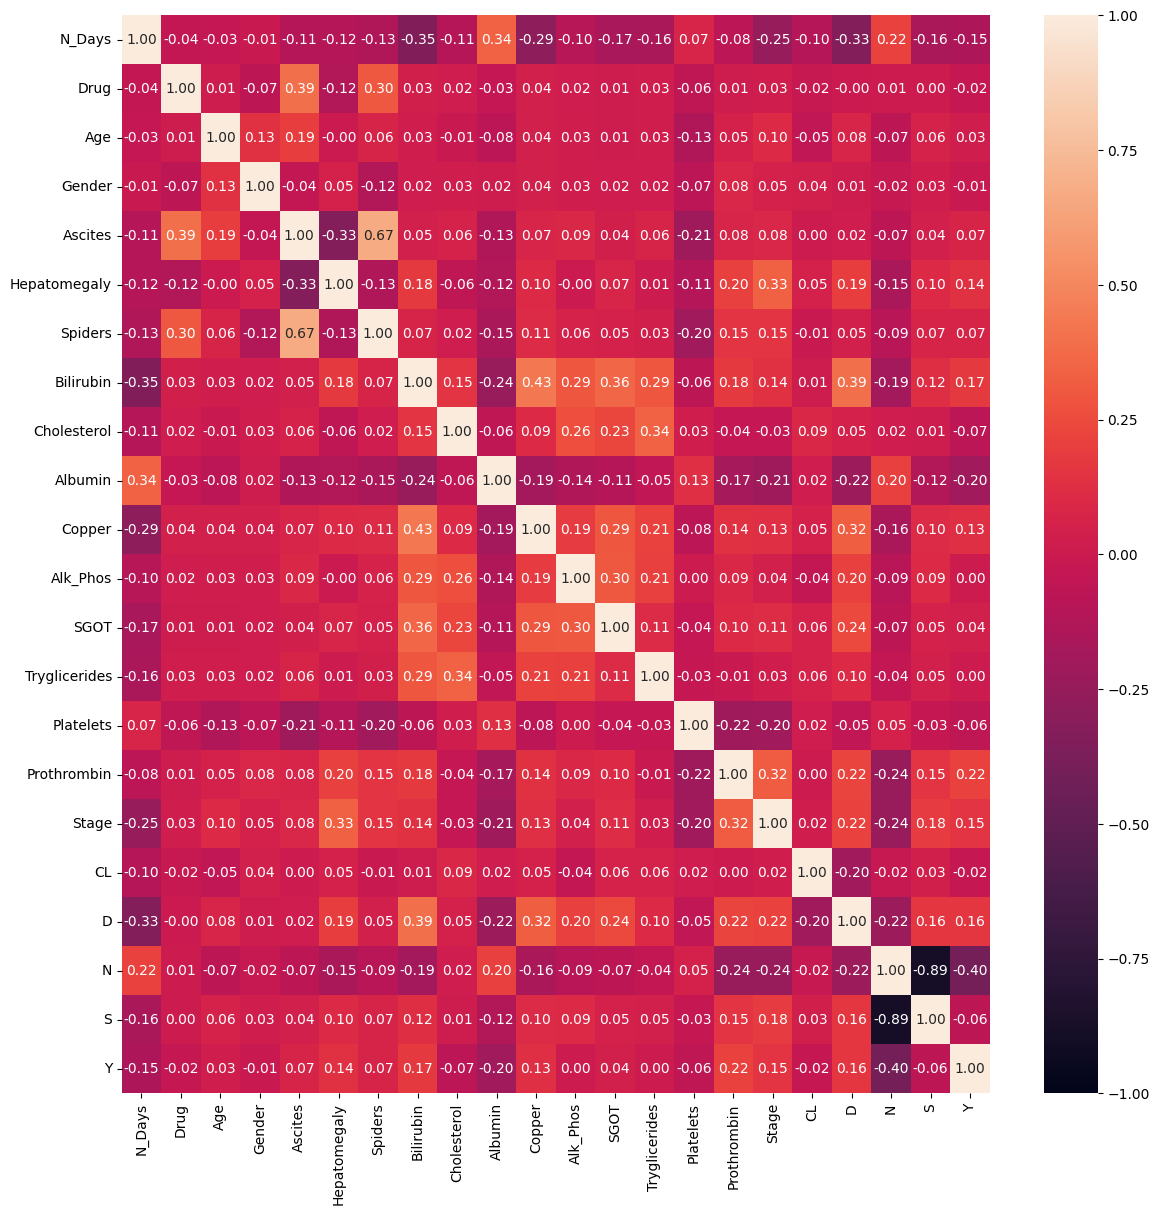

In [182]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f", vmax=1, vmin=-1)

In [184]:
scaler = StandardScaler()

In [185]:
X = df.drop("Stage", axis=1)
y = df["Stage"]

In [186]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=42)

In [188]:
scaled_train = scaler.fit_transform(X_tr[num_cols])

In [189]:
scaled_test = scaler.transform(X_te[num_cols])

In [190]:
X_tr.head()

N_Days  Drug    Age  Gender  Ascites  Hepatomegaly  Spiders  Bilirubin  \
220      1419     1  14610       0        1             0        1        3.0   
3431      466     0  17664       0        0             0        0        7.1   
1013      990     1  21550       0        1             0        1        1.3   
16667    2609     1  16802       0        1             0        1        0.9   
916       839     1  15265       0        0             0        0        2.0   

       Cholesterol  Albumin  ...     Alk_Phos        SGOT  Tryglicerides  \
220     369.510563     3.15  ...  1982.655769  122.556346     124.702128   
3431    369.510563     3.51  ...  1982.655769  122.556346     124.702128   
1013    369.510563     3.12  ...  1982.655769  122.556346     124.702128   
16667   258.000000     2.81  ...   559.000000   43.400000     133.000000   
916     247.000000     3.16  ...  1050.000000  117.000000      88.000000   

       Platelets  Prothrombin  CL  D    N    S    Y  
220        139.0    10.000000   0  0  1.0  0.0  0.0  
3431       192.0    10.500000   0  1  1.0  0.0  0.0  
1013       125.0     9.600000   0  0  1.0  0.0  0.0  
16667      419.0    10.731731   0  0  1.0  0.0  0.0  
916        474.0    10.900000   0  0  1.0  0.0  0.0  

[5 rows x 21 columns]

In [192]:
X_tr[num_cols] = scaled_train

In [193]:
X_tr.head()

N_Days  Drug       Age  Gender  Ascites  Hepatomegaly  Spiders  \
220   -0.478641     1 -1.016436       0        1             0        1   
3431  -1.353017     0 -0.191186       0        0             0        0   
1013  -0.872248     1  0.858886       0        1             0        1   
16667  0.613182     1 -0.424116       0        1             0        1   
916   -1.010790     1 -0.839443       0        0             0        0   

       Bilirubin  Cholesterol   Albumin  ...  Alk_Phos      SGOT  \
220     0.011347     0.402868 -1.027177  ...  0.458967  0.116691   
3431    0.977995     0.402868 -0.023434  ...  0.458967  0.116691   
1013   -0.389458     0.402868 -1.110823  ...  0.458967  0.116691   
16667  -0.483765    -0.889753 -1.975157  ... -1.332954 -1.914430   
916    -0.224421    -1.017264 -0.999296  ... -0.714944 -0.025883   

       Tryglicerides  Platelets  Prothrombin  CL  D    N    S    Y  
220         0.203561  -1.259371    -0.861768   0  0  1.0  0.0  0.0  
3431        0.203561  -0.663658    -0.174366   0  1  1.0  0.0  0.0  
1013        0.203561  -1.416729    -1.411691   0  0  1.0  0.0  0.0  
16667       0.429533   1.887790     0.144219   0  0  1.0  0.0  0.0  
916        -0.795930   2.505982     0.375556   0  0  1.0  0.0  0.0  

[5 rows x 21 columns]

In [194]:
X_te[num_cols] = scaled_test

In [195]:
X_te.head()

N_Days  Drug       Age  Gender  Ascites  Hepatomegaly  Spiders  \
3946 -0.569474     1 -0.226855       0        1             0        1   
4048  0.637037     1  1.450937       0        1             0        1   
2465  0.035158     0  0.161990       0        0             1        1   
3726 -0.053840     0  0.934007       0        0             1        0   
6622  0.949903     0  1.416079       0        0             0        0   

      Bilirubin  Cholesterol   Albumin  ...  Alk_Phos      SGOT  \
3946   1.308070    -1.631636  1.287008  ... -1.010733  1.154459   
4048  -0.200844    -0.959304 -0.497424  ... -0.975490 -1.357617   
2465   0.082077    -0.379709 -0.302252  ... -1.646364 -0.880348   
3726  -0.318728     1.451814 -1.584813  ... -0.183783 -0.840576   
6622  -0.530919    -0.298565  0.896664  ... -0.956610 -1.954203   

      Tryglicerides  Platelets  Prothrombin  CL  D    N    S    Y  
3946      -1.068255   0.067209     2.162803   0  0  0.0  0.0  1.0  
4048      -0.932092  -1.079533    -0.724288   0  0  1.0  0.0  0.0  
2465      -1.994160  -1.753925     1.200440   0  0  1.0  0.0  0.0  
3726       0.021045  -0.787297    -0.724288   0  0  1.0  0.0  0.0  
6622      -0.305745   0.494047     0.513037   0  0  1.0  0.0  0.0  

[5 rows x 21 columns]

In [196]:
y_te

3946     3
4048     3
2465     3
3726     2
6622     2
        ..
8795     2
1529     2
11004    2
3482     1
18099    3
Name: Stage, Length: 2191, dtype: int64

In [197]:
pca = PCA(n_components=10)

In [198]:
train = pca.fit_transform(X_tr)

In [199]:
test = pca.transform(X_te)

In [201]:
train.shape

(6570, 10)

In [202]:
test.shape

(2191, 10)

In [207]:
log = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=11)
lsvc = SVC(kernel="linear")
psvc = SVC(kernel="poly")
rsvc = SVC(kernel="rbf")
rf = RandomForestClassifier(n_estimators=150, n_jobs=-1)
ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=150)

In [208]:
log.fit(train, y_tr)
dt.fit(train, y_tr)
knn.fit(train, y_tr)
lsvc.fit(train, y_tr)
psvc.fit(train, y_tr)
rsvc.fit(train, y_tr)
rf.fit(train, y_tr)
ab.fit(train, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=150)

In [210]:
print("Logistic Score :", log.score(train, y_tr))
print("Decision Tree Score :", dt.score(train, y_tr))
print("KNN Score :", knn.score(train, y_tr))
print("Linear SVC Score :", lsvc.score(train, y_tr))
print("Poly SVC Score :", psvc.score(train, y_tr))
print("RBF SVC Score :", rsvc.score(train, y_tr))
print("Random Forest Score :", rf.score(train, y_tr))
print("ADABoost Score :", ab.score(train, y_tr))

Logistic Score : 0.5442922374429223
Decision Tree Score : 0.9919330289193303
KNN Score : 0.7410958904109589
Linear SVC Score : 0.5406392694063927
Poly SVC Score : 0.6316590563165906
RBF SVC Score : 0.680365296803653
Random Forest Score : 0.9919330289193303
ADABoost Score : 0.9919330289193303


In [213]:
print("Logistic Accuracy :", accuracy_score(y_te, log.predict(test)))
print("Decision Tree Accuracy :", accuracy_score(y_te, dt.predict(test)))
print("KNN Accuracy :", accuracy_score(y_te, knn.predict(test)))
print("Linear SVC Accuracy :", accuracy_score(y_te, lsvc.predict(test)))
print("Poly SVC Accuracy :", accuracy_score(y_te, psvc.predict(test)))
print("RBF SVC Accuracy :", accuracy_score(y_te, rsvc.predict(test)))
print("Random Forest Accuracy :", accuracy_score(y_te, rf.predict(test)))
print("Adaboost Accuracy :", accuracy_score(y_te, ab.predict(test)))

Logistic Accuracy : 0.5344591510725696
Decision Tree Accuracy : 0.5892286627110909
KNN Accuracy : 0.6649931538110452
Linear SVC Accuracy : 0.5344591510725696
Poly SVC Accuracy : 0.5787311729803742
RBF SVC Accuracy : 0.625741670470105
Random Forest Accuracy : 0.700593336376084
Adaboost Accuracy : 0.6225467822911912


In [214]:
params = {
    "n_estimators":[100, 150, 200, 250],
    "criterion": ['gini','entropy'],
    "max_depth":[3, 5, 7, 9, 11, 13, 15]
}

In [215]:
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params,
                   n_jobs=-1, scoring="accuracy", verbose=True, cv=15)

In [216]:
gscv.fit(train, y_tr)

Fitting 15 folds for each of 56 candidates, totalling 840 fits


GridSearchCV(cv=15, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='accuracy', verbose=True)

In [217]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}

In [218]:
gscv.best_score_

0.7095890410958903

In [240]:
pca1 = PCA(n_components=15)
train1 = pca1.fit_transform(X_tr)
test1 = pca1.transform(X_te)

In [241]:
rf2 = RandomForestClassifier(criterion="entropy", n_estimators=300, max_depth=15)

In [242]:
rf2.fit(train1, y_tr)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=300)

In [243]:
rf2.score(train1, y_tr)

0.9904109589041096

In [244]:
y_pr = rf2.predict(test1)

In [245]:
accuracy_score(y_te, y_pr)

0.7261524418073939